In [1]:
import json
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree
from pyproj import Geod
from shapely.geometry import LineString
import numpy as np
import tempun
import seaborn as sns
#import geoplot as gplt

In [2]:
# global parameters for plots
plt.style.use("fast")
plt.rcParams['figure.dpi'] = 600
plt.rcParams['figure.figsize'] = (4.45, 3)
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff", dpi=600)
    fig.savefig("../figures/" + fig_name + ".png", dpi=600)

# Loading data

In [3]:
### TO-DO: add  also Hanson cities and do the poleis accordingly

In [4]:
%%time
GIST = gpd.read_file("../data/large_data/GIST_lemmatized.geojson")

CPU times: user 51.8 s, sys: 713 ms, total: 52.5 s
Wall time: 53.8 s


In [5]:
%%time
GIST.head(5)

CPU times: user 673 µs, sys: 567 µs, total: 1.24 ms
Wall time: 1.91 ms


,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"{'data': ['ἔδοχσεν', 'το͂ι', 'δέμοι', 'τὸς', '...",c. 510-500 a.,-511.0,-499.0,"{'data': ['range', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786251']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 1']},{'data': ['1672']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
1,2,IG I³\n2,Att. — non-stoich. — c. 500 a.,14.0,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,[--------]ν βολ ---------- [------] α εκον ---...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"{'data': ['ν', 'βοῦς', 'α', 'θύος', 'γνώστης',...",c. 500 a.,-505.0,-495.0,"{'data': ['exact', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786252']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 2']},{'data': ['1707']},{'data': []},{'data': ['373']},NaN,NaN,NaN,None
2,3,IG I³\n3,Att. — stoich. 21 — 490-480 a.,13.0,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,"{'data': ['Ἤρ', 'εἰσπλέω', 'Ἀθῆναι', 'τὶς', 'ἀ...",490-480 a.,-490.0,-480.0,{'data': ['range']},1701.0,1700.0,{'data': ['786253']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 3']},{'data': ['ii-1b']},{'data': []},{'data': ['373']},NaN,NaN,NaN,None
3,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"{'data': ['ἐάν', 'τις', 'ἐν', 'ἒ', 'φρουρά', '...",485/4 a.,-485.0,-484.0,{'data': ['range']},1701.0,1700.0,{'data': ['786254']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},"{'data': ['IG I³ 4(A)', 'IG I³ 4(B)']}",{'data': ['1692']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275)
4,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"{'data': ['δοκέω', 'βουλή', 'καὶ', 'ὁ', 'δῆμος...",c. 500 a.,-505.0,-495.0,"{'data': ['exact', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786255']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 5']},{'data': ['1284']},{'data': []},{'data': ['10345']},23.541498,38.044135,Eleusis,POINT (23.54150 38.04414)


In [6]:
len(GIST)

217863

In [7]:
((GIST["not_before"].notnull()) | (GIST["not_after"].notnull())).sum()

131677

## additional geographic data

In [14]:
# correct province boundaries
# province file from "https://edh.ub.uni-heidelberg.de/data/download/roman_province_boundaries.json"
provinces = gpd.read_file("../data/roman_province_boundaries.json")
provinces = provinces.to_crs(3035)
# based on advice from ChatGPT...
invalid_geometries = provinces[~provinces.geometry.is_valid]
# Make invalid geometries valid by buffering with a distance of 0
provinces.loc[~provinces.geometry.is_valid, 'geometry'] = invalid_geometries.buffer(0)

In [9]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
#Greece = gpd.read_file("../data/Greece_AL2.GeoJson", driver="GeoJSON") # borders of greek downloaded from https://www.kaggle.com/datasets/lsind18/greeceborders?resource=download
#Asia_Minor = gpd.read_file("../data/PHI_asia-minor.geojson", driver="GeoJSON")

In [10]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
pleiades_regions = pleiades_regions.to_crs(3035)
pleiades_regions_merged = pleiades_regions.unary_union
pleiades_regions_merged_buffer = pleiades_regions_merged.buffer(distance=2000)

In [11]:
polis = pd.read_csv("../data/polis_database.csv")
polis.head(5)

,name,polis_id,xcoord,ycoord,edges,Polisity,Hellenicity,Fame,In_out,Size,Silver_1st,Bronze_1st,Grid,Colonies,Victors,Proxenoi,Walls,Delian_League,Koinon,Regime,Region_num,Region name,Source,Elevation_m
0,1-Alalie,1,9.511698,42.102432,none,1.0,1.0,1.12,1.0,3.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,Spain & France,HansonNielson,41.7
1,10-Akrai,10,14.916667,37.083333,none,3.0,1.0,1.25,2.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,NaN,0.0,2.0,Sikelia,HansonNielson,604.0
2,100-Kassopa,100,20.687268,39.140534,none,1.0,1.0,1.37,3.0,5.0,4.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,Epeiros,HansonNielson,452.4
3,1000-Rhodos,1000,28.227611,36.443113,none,1.0,1.0,7.00,2.0,5.0,5.0,4.0,5.0,3.0,1.0,1.0,1.0,0.0,NaN,2.0,42.0,Rhodos,HansonNielson,13.6
4,1001-Aspendos,1001,31.170175,36.939091,none,1.0,2.0,2.25,2.0,4.0,5.0,4.0,NaN,0.0,0.0,1.0,1.0,1.0,NaN,0.0,43.0,Pamphylia & Kilikia,HansonNielson,44.2


In [12]:
polis = gpd.GeoDataFrame(polis, geometry=gpd.points_from_xy(polis["xcoord"], polis["ycoord"]))

In [13]:
len(polis)

1235

# Overview of spatiotemporal metadata

In [15]:
pleiades_regions_merged_buffer_gs = gpd.GeoSeries(pleiades_regions_merged_buffer, crs ="epsg:3035")
type(pleiades_regions_merged_buffer_gs)

geopandas.geoseries.GeoSeries

In [16]:
pleiades_regions_merged_buffer_gs = pleiades_regions_merged_buffer_gs.to_crs("epsg:4326")

(22.0, 56.0)

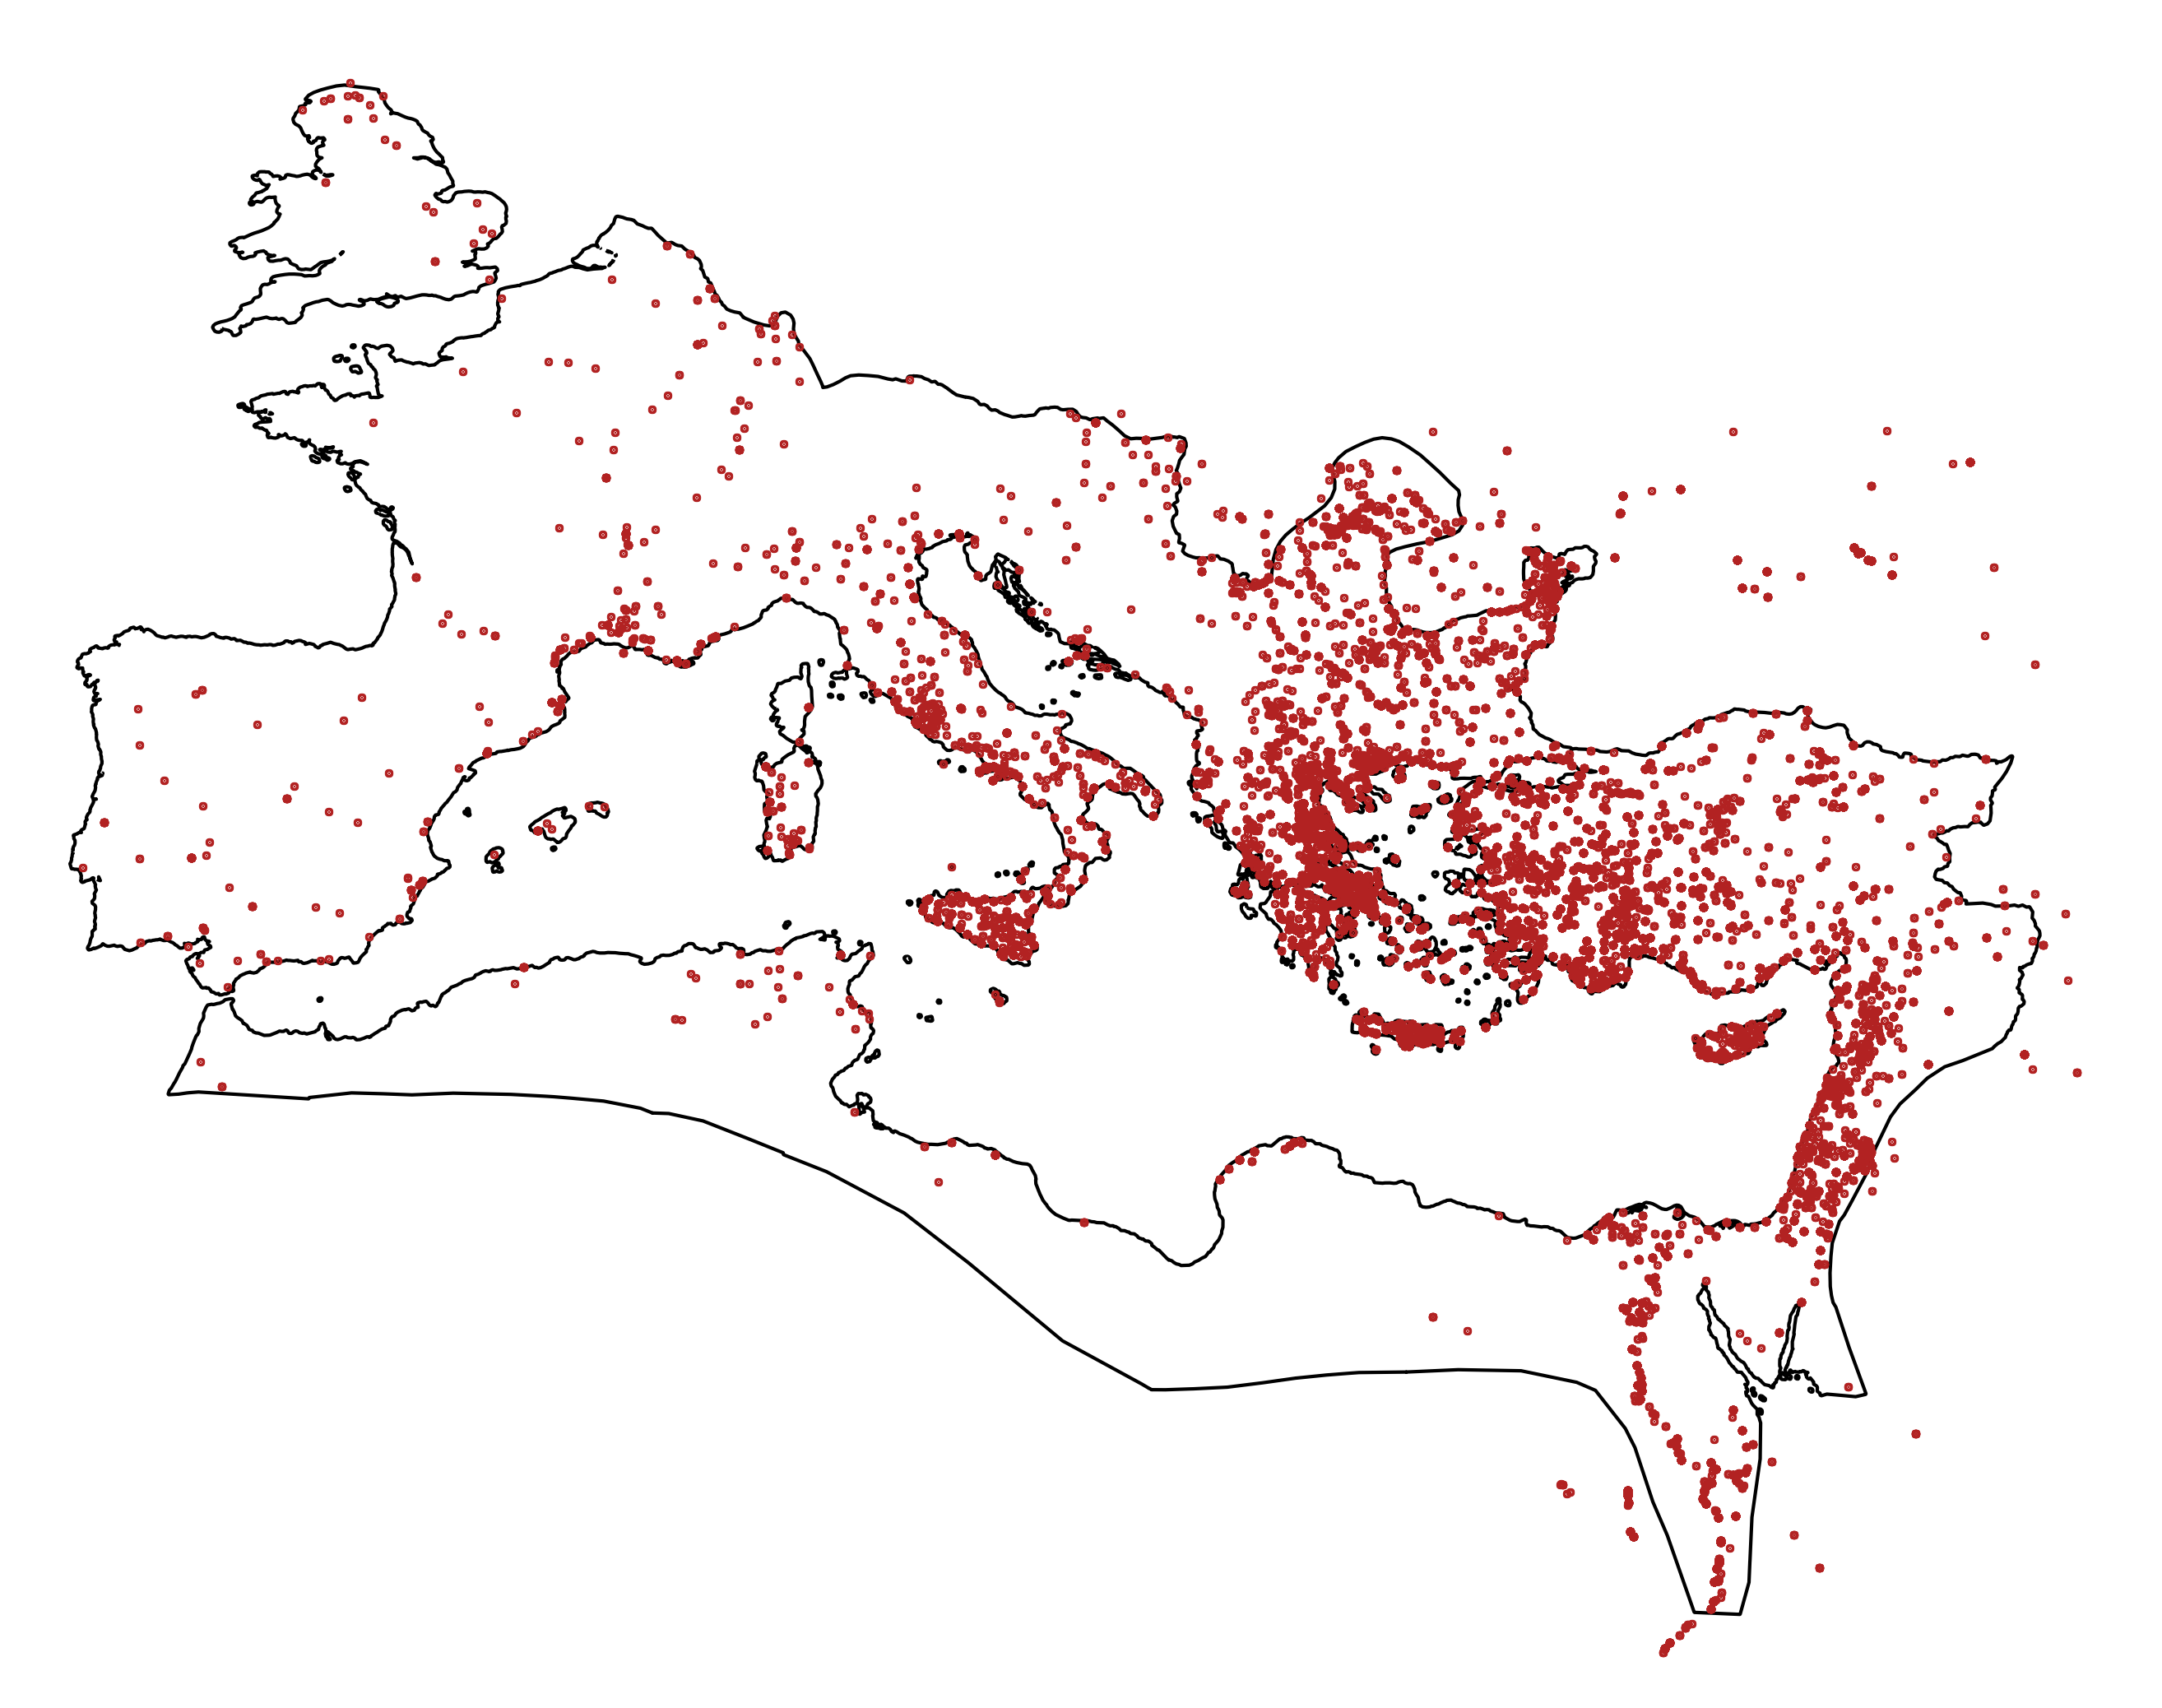

In [18]:
fig, ax = plt.subplots(figsize=(4.45, 3.5), tight_layout=True)
ax.axis("off")
#gplt.kdeplot(GIST[(~GIST["greece?"]) & (GIST["geometry"].notnull())], cmap='Greens', ax=ax, fill=True)
#gplt.kdeplot(GIST[GIST["greece?"]], cmap='Reds', ax=ax, fill=True)

pleiades_regions_merged_buffer_gs.plot(ax=ax, color='white', edgecolor='black', linewidth=0.5)

GIST.plot(marker=",", markersize=0.02, ax=ax, color="firebrick")
# GIST[GIST["greece?"]].plot(marker=",", markersize=0.02, ax=ax, color="firebrick") #, alpha=0.7)
# GIST[~GIST["greece?"]].plot(marker=",", markersize=0.02, ax=ax, color="darkolivegreen") #, alpha=0.7)

ax.set_xlim(-10,43)
ax.set_ylim(22,56)

In [23]:
GIST.head(5)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry,random_dates,geotemporal?,greece?
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"{'data': ['ἔδοχσεν', 'το͂ι', 'δέμοι', 'τὸς', '...",c. 510-500 a.,-511.0,-499.0,"{'data': ['range', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786251']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 1']},{'data': ['1672']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275),"[-501, -505, -509, -503, -510, -506, -504, -50...",True,True
1,2,IG I³\n2,Att. — non-stoich. — c. 500 a.,14.0,[․․8-9․․․]ν̣ βολ — — — — — — — — — —\n[․6-7․․]...,[--------]ν βολ ---------- [------] α εκον ---...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,ν βολ α ℎεκον σιον γνοσθε͂ι δὲ ν ἀτεχνος μὲ π ...,"{'data': ['ν', 'βοῦς', 'α', 'θύος', 'γνώστης',...",c. 500 a.,-505.0,-495.0,"{'data': ['exact', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786252']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 2']},{'data': ['1707']},{'data': []},{'data': ['373']},NaN,NaN,None,None,"[-504, -502, -503, -498, -497, -500, -498, -49...",False,False
2,3,IG I³\n3,Att. — stoich. 21 — 490-480 a.,13.0,[․]αρ[․․․․]ι ℎερακλειο[․․5․․]\n[․]αρ̣ο#⁷[․] τι...,[-]αρ[----]ι ερακλειο[-----] [-]αρο [-] τιθενα...,αρι ℎερακλειο αρο τιθέναι τὸς ἀέτας τριάκοντα ...,αρι ℎερακλειο αρο τιθέναι τὸς ἀθλοθέτας τριάκο...,"{'data': ['Ἤρ', 'εἰσπλέω', 'Ἀθῆναι', 'τὶς', 'ἀ...",490-480 a.,-490.0,-480.0,{'data': ['range']},1701.0,1700.0,{'data': ['786253']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 3']},{'data': ['ii-1b']},{'data': []},{'data': ['373']},NaN,NaN,None,None,"[-486, -485, -484, -486, -483, -485, -480, -48...",False,False
3,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"{'data': ['ἐάν', 'τις', 'ἐν', 'ἒ', 'φρουρά', '...",485/4 a.,-485.0,-484.0,{'data': ['range']},1701.0,1700.0,{'data': ['786254']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},"{'data': ['IG I³ 4(A)', 'IG I³ 4(B)']}",{'data': ['1692']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275),"[-484, -485, -484, -484, -484, -485, -485, -48...",True,True
4,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"{'data': ['δοκέω', 'βουλή', 'καὶ', 'ὁ', 'δῆμος...",c. 500 a.,-505.0,-495.0,"{'data': ['exact', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786255']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 5']},{'data': ['1284']},{'data': []},{'data': ['10345']},23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),"[-496, -502, -504, -498, -501, -503, -499, -50...",True,True


In [19]:
polis = polis[(polis["geometry"].notnull()) & (~polis["geometry"].is_empty)]

/opt/homebrew/Caskroom/miniconda/base/lib/python3.11/site-packages/geopandas/geoseries.py:766: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


In [20]:
geod = Geod(ellps="WGS84")
def get_dist_m(inscr_geo, city_geo):
    line_string = LineString([inscr_geo, city_geo])
    return np.round(geod.geometry_length(line_string), 2)

def ckdnearest(inscriptions, polis):

    polis = polis[['name', 'geometry']]
    insr_geometries = np.array(list(inscriptions.geometry.apply(lambda x: (x.x, x.y))))
    polis_geometries = np.array(list(polis.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(polis_geometries)
    dist, idx = btree.query(insr_geometries, k=1)
    nearest_polis_df = polis.iloc[idx].rename(columns={"geometry": "polis_geo"}).reset_index(drop=True)
    nearest_polis_df["polis_geo"] = [[geom.x, geom.y] for geom in nearest_polis_df["polis_geo"]]

    merge_gdf = pd.concat(
        [
            inscriptions.reset_index(drop=True),
            nearest_polis_df,
            pd.Series(dist, name="polis_dist")
        ],
        axis=1)
    merge_gdf["polis_dist"] = merge_gdf.apply(lambda row: get_dist_m(row.geometry, row["polis_geo"]), axis=1)
    return merge_gdf

In [22]:
GISTgeo = GIST[GIST.geometry.notnull()]

In [23]:
len(GISTgeo)

180061

In [24]:
GISTnogeo = GIST[GIST.geometry.isnull()]

In [25]:
%%time
GISTgeo = ckdnearest(GISTgeo, polis)

CPU times: user 7.28 s, sys: 63.8 ms, total: 7.34 s
Wall time: 7.49 s


In [26]:
GISTgeo.head(10)

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry,name,polis_geo,polis_dist
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"{'data': ['ἔδοχσεν', 'το͂ι', 'δέμοι', 'τὸς', '...",c. 510-500 a.,-511.0,-499.0,"{'data': ['range', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786251']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 1']},{'data': ['1672']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275),361-Athenai,"[23.7278, 37.9778]",653.43
1,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"{'data': ['ἐάν', 'τις', 'ἐν', 'ἒ', 'φρουρά', '...",485/4 a.,-485.0,-484.0,{'data': ['range']},1701.0,1700.0,{'data': ['786254']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},"{'data': ['IG I³ 4(A)', 'IG I³ 4(B)']}",{'data': ['1692']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275),361-Athenai,"[23.7278, 37.9778]",653.43
2,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"{'data': ['δοκέω', 'βουλή', 'καὶ', 'ὁ', 'δῆμος...",c. 500 a.,-505.0,-495.0,"{'data': ['exact', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786255']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 5']},{'data': ['1284']},{'data': []},{'data': ['10345']},23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),362-Eleusis,"[23.5423, 38.0394]",530.31
3,6,IG I³\n6,Att. — stoich. 23/11 — ante 460 a.,160.0,— — — — — — — — — — — — —\n[․․․․․․15․․․․․․․] δ...,------------- [---------------] δραχμεισ[ι ---...,δραχμε͂ιστες τὸς ιο μενος δεμο το͂ν πόλεο οκε͂...,δραχμε͂ισι τες τὸς ιο μενος δεμο το͂ν πόλεον δ...,"{'data': ['δραχμός', 'τε', 'τὶς', 'μόνος', 'δῆ...",ante 460 a.,NaN,-461.0,{'data': ['ante']},1701.0,1700.0,{'data': ['786256']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 6']},{'data': ['6']},{'data': []},{'data': ['10345']},23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),362-Eleusis,"[23.5423, 38.0394]",530.31
4,11,IG I³\n11,Att. — stoich. 48 — ante med. s. V a.,22.0,[χσυμμαχία καὶ ℎόρ]κ̣ο̣[ς] Ἀ̣[θ]ε̣ν̣α̣[ίον κα]...,[χσυμμαχια και ορ]κο[ς] α[θ]ενα[ιον κα]ι εγεστ...,κο Ἀεναὶ Ἐγεσταί ο͂ι ἐπρυτάνευε οΙ ον ἐ͂ρχε Ἀ...,χσυμμαχία καὶ ℎόρκος Ἀθεναίον καὶ Ἐγεσταίον ἔδ...,"{'data': ['συμμαχία', 'καὶ', 'ὅρκος', 'φθινάς'...",ante med. s. V a.,NaN,-456.0,"{'data': ['range', 'cent', 'phase', 'middle', ...",1701.0,1700.0,{'data': ['786261']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 11']},{'data': ['5770']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275),361-Athenai,"[23.7278, 37.9778]",653.43
5,14,IG I³\n14,Att. — stoich. 23 — 453/2?,46.0,[ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι· — — — ἐπρ...,[εδοχσεν τει βολει και τοι δεμοι --- επρυτανευ...,ἐπεστάτε ΛΙος ἀπάγεν στο Παναθέναια τὰ μεγάχσν...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ἐπρυτάνευε ...,"{'data': ['δοκέω', 'βουλή', 'καὶ', 'ὁ', 'δῆμος...",453/2?,-453.0,-452.0,{'data': ['range']},1701.0,1700.0,{'data': ['786264']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 14']},{'data': ['296']},{'data': []},{'data': [

In [ ]:
# TO-DO: add Hansons cities following the same logic as above

In [ ]:
GIST = gpd.concat([GISTgeo, GISTnongeo])

In [35]:
GIST[:230]

,PHI_ID,reference,metadata,lines,text_raw,text_iphi,clean_text_conservative,clean_text_interpretive_word,lemmata,raw_date,not_before,not_after,date_type,region_main_id,region_sub_id,TM_ID,EDH_ID,EDCS_ID,EDR_ID,LUPA_ID,ISic_ID,IG_ID,atticinscriptions_ID,Attalus_ID,TMgeo_ID,x_long,y_lat,TMgeo_name,geometry,random_dates,geotemporal?,greece?,name,polis_geo,polis_dist
0,1,IG I³\n1,Att. — Ath.: Akr. — stoich. 35 — c. 510-500 a....,12.0,ἔδοχσεν το͂ι δέμοι· τ̣[ὸς ἐ Σ]αλαμ̣[ῖνι κλερόχ...,εδοχσεν τοι δεμοι τ[ος ε σ]αλαμ[ινι κλεροχ]ος ...,ἔδοχσεν το͂ι δέμοι ταλαμος οἰκε͂ν ἐᾶ Σαλαμῖνι ...,ἔδοχσεν το͂ι δέμοι τὸς ἐ Σαλαμῖνι κλερόχος οἰκ...,"{'data': ['ἔδοχσεν', 'το͂ι', 'δέμοι', 'τὸς', '...",c. 510-500 a.,-511.0,-499.0,"{'data': ['range', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786251']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 1']},{'data': ['1672']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275),"[-501, -505, -509, -503, -510, -506, -504, -50...",True,True,361-Athenai,"[23.7278, 37.9778]",653.43
1,4,IG I³\n4,Att. — stoich. 38 — 485/4 a.,56.0,[․․․․․․․․․․․․․․․․․․38․․․․․․․․․․․․․․․․․․]\n[․․․...,[--------------------------------------] [----...,δέ τις αν ἒ φρορὰν μ ντέκοντα δχμὰς τ ας ℎες π...,ἐὰν δέ τις αν ἒ φρορὰν μὲ πεντέκοντα δραχμὰς τ...,"{'data': ['ἐάν', 'τις', 'ἐν', 'ἒ', 'φρουρά', '...",485/4 a.,-485.0,-484.0,{'data': ['range']},1701.0,1700.0,{'data': ['786254']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},"{'data': ['IG I³ 4(A)', 'IG I³ 4(B)']}",{'data': ['1692']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275),"[-484, -485, -484, -484, -484, -485, -485, -48...",True,True,361-Athenai,"[23.7278, 37.9778]",653.43
2,5,IG I³\n5,Att. — c. 500 a.,6.0,[ἔδοχσε]ν [⋮ τε͂ι βολε͂ι] ⋮ καὶ [τ]ο͂ι δέμοι ⋮...,[εδοχσε]ν [ τει βολει] και [τ]οι δεμοι οτε παρ...,ν καὶ ο͂ι δέμοι ℎότε Παραιβάτες λεια θν τὸς ℎι...,ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι ℎότε Παραιβ...,"{'data': ['δοκέω', 'βουλή', 'καὶ', 'ὁ', 'δῆμος...",c. 500 a.,-505.0,-495.0,"{'data': ['exact', 'phase', 'ca']}",1701.0,1700.0,{'data': ['786255']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 5']},{'data': ['1284']},{'data': []},{'data': ['10345']},23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),"[-496, -502, -504, -498, -501, -503, -499, -50...",True,True,362-Eleusis,"[23.5423, 38.0394]",530.31
3,6,IG I³\n6,Att. — stoich. 23/11 — ante 460 a.,160.0,— — — — — — — — — — — — —\n[․․․․․․15․․․․․․․] δ...,------------- [---------------] δραχμεισ[ι ---...,δραχμε͂ιστες τὸς ιο μενος δεμο το͂ν πόλεο οκε͂...,δραχμε͂ισι τες τὸς ιο μενος δεμο το͂ν πόλεον δ...,"{'data': ['δραχμός', 'τε', 'τὶς', 'μόνος', 'δῆ...",ante 460 a.,NaN,-461.0,{'data': ['ante']},1701.0,1700.0,{'data': ['786256']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 6']},{'data': ['6']},{'data': []},{'data': ['10345']},23.541498,38.044135,Eleusis,POINT (23.54150 38.04414),"[-461, -461, -461, -461, -461, -461, -461, -46...",True,True,362-Eleusis,"[23.5423, 38.0394]",530.31
4,11,IG I³\n11,Att. — stoich. 48 — ante med. s. V a.,22.0,[χσυμμαχία καὶ ℎόρ]κ̣ο̣[ς] Ἀ̣[θ]ε̣ν̣α̣[ίον κα]...,[χσυμμαχια και ορ]κο[ς] α[θ]ενα[ιον κα]ι εγεστ...,κο Ἀεναὶ Ἐγεσταί ο͂ι ἐπρυτάνευε οΙ ον ἐ͂ρχε Ἀ...,χσυμμαχία καὶ ℎόρκος Ἀθεναίον καὶ Ἐγεσταίον ἔδ...,"{'data': ['συμμαχία', 'καὶ', 'ὅρκος', 'φθινάς'...",ante med. s. V a.,NaN,-456.0,"{'data': ['range', 'cent', 'phase', 'middle', ...",1701.0,1700.0,{'data': ['786261']},{'data': []},{'data': []},{'data': []},{'data': []},{'data': []},{'data': ['IG I³ 11']},{'data': ['5770']},{'data': []},{'data': ['364']},23.723985,37.972747,Athenai,POINT (23.72399 37.97275),"[-456, -456, -456, -456, -456, -456, -456, -45...",True,True,361-Athenai,"[23.7278, 37.9778]",653.43
5,14,IG I³\n14,Att. — stoich. 23 — 453/2?,46.0,[ἔδοχσεν τε͂ι βολε͂ι καὶ το͂ι δέμοι· — — — ἐπρ...,[εδοχσεν τει βολει και τοι δεμοι --- επρυτανευ...,ἐπεστάτε ΛΙος

In [36]:
GIST["polis?"] = GIST["polis_dist"] < 5000